# Color Threshold, Green Screen

### Import resources

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [2]:
# Read in the image
image = mpimg.imread('images/car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)


Image dimensions: (450, 660, 3)


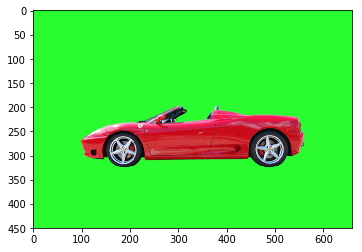

In [3]:
# Display the image
plt.imshow(image)

### Define the color threshold

In [9]:
## TODO: Define our color selection boundaries in RGB values
lower_green = np.array([0,150,0]) 
upper_green = np.array([200,255,200])


### Create a mask

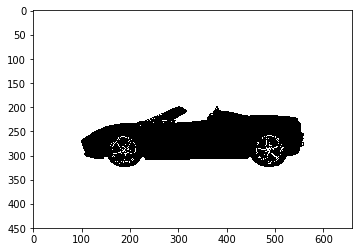

In [10]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

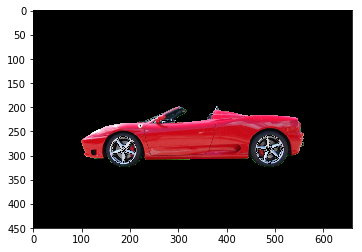

In [11]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)


### Mask and add a background image

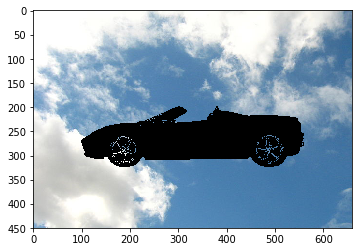

In [17]:
# Load in a background image, and convert it to RGB 
background_image = mpimg.imread('images/sky.jpg')

## TODO: Crop it or resize the background to be the right size (450x660)
background = np.copy(background_image[:450, :660])

## TODO: Mask the cropped background so that the pizza area is blocked
# Hint mask the opposite area of the previous image
background[mask==0] = [0,0,0]

## TODO: Display the background and make sure 
plt.imshow(background)

### Create a complete image

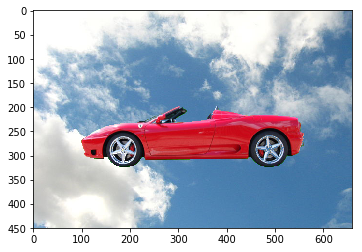

In [18]:
## TODO: Add the two images together to create a complete image!
# complete_image = masked_image + crop_background

complete_imag = masked_image + background

plt.imshow(complete_imag)

### Image2

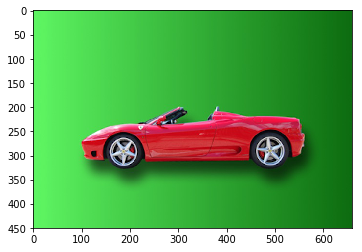

In [32]:
car_image = mpimg.imread('images/car_green_screen2.jpg')
plt.imshow(car_image)

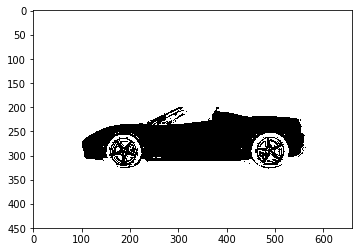

In [42]:
low_range = np.array([5,30,5])
high_range = np.array([150,250,150])

mask2 = cv2.inRange(car_image, low_range, high_range)

plt.imshow(mask2, cmap='gray')

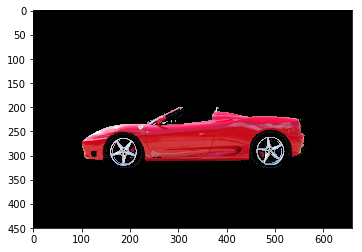

In [43]:
filter_car = np.copy(car_image)

filter_car[mask2 != 0] = [0,0,0]
plt.imshow(filter_car)

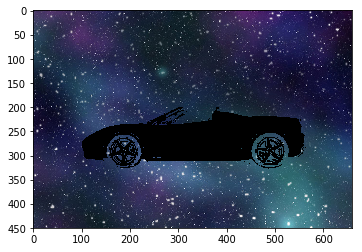

In [44]:
space_img = mpimg.imread('images/space_background.jpg')
space_img = np.copy(space_img[:450, :660])

space_img[mask2 == 0] = [0,0,0]

plt.imshow(space_img)

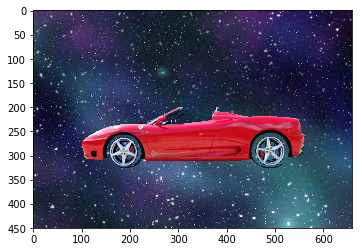

In [45]:
space_car_img = space_img + filter_car

plt.imshow(space_car_img)